<a href="https://colab.research.google.com/github/Romuald-Yapo/Data-Science-Projects/blob/main/Capacitated%20Vehicle%20Routing%20Problem%20Solutions%20Classification/Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>CHALLENGE 2</center>

## <center> SUPERVISED LEARNING </center>

 <center> NGUYEN Le Kim </center>
<center> TERTULIANO MOREIRA DE SOUSA Emmanuela </center>
<center> YAPO Jean </center>
 <center> XIONG Menglin </center>
<center> FEUNKEU KAMGUEP Boris </center>

#Import necessary library

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import xgboost as xgb

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1 - DATA QUALITY ASSESSMENT

## Upload, Merge, Rename Dataset



In [ ]:
#### Data Loading

# Folder 1 : depot centered, random customers's postition

# Create a new dataframe with column filled with zeros
data_2113=pd.DataFrame(np.zeros((0,20)))

# Upload the data from each file csv to concatenate in one dataframe
for file in os.listdir("/content/drive/MyDrive/FML/HGS/2113"):
  data_2113=pd.concat([data_2113,pd.read_csv(f"/content/drive/MyDrive/FML/HGS/2113/{file}", sep = ";", header = None)],axis = 0)


# Folder 2 : depot centered, customers's postition forming clusters

data_2213=pd.DataFrame(np.zeros((0,20)))
for file in os.listdir("/content/drive/MyDrive/FML/HGS/2213"):
  data_2213=pd.concat([data_2213,pd.read_csv(f"/content/drive/MyDrive/FML/HGS/2213/{file}", sep = ";", header = None)],axis = 0)


#Folder 3 : depot near the corner of the map, random customers's position

data_3113=pd.DataFrame(np.zeros((0,20)))
for file in os.listdir("/content/drive/MyDrive/FML/HGS/3113"):
  data_3113=pd.concat([data_3113,pd.read_csv(f"/content/drive/MyDrive/FML/HGS/3113/{file}", sep = ";", header = None)],axis = 0)


#Folder 4 : depot near the corner of the map, customers's postition forming clusters

data_3213=pd.DataFrame(np.zeros((0,20)))
for file in os.listdir("/content/drive/MyDrive/FML/HGS/3213"):
  data_3213=pd.concat([data_3213,pd.read_csv(f"/content/drive/MyDrive/FML/HGS/3213/{file}", sep = ";", header = None)],axis = 0)

In [ ]:
# After merging all files in each sub-folder for the first time,
# uncomment these lines to save dataset for saving time for the next time

# data_2113.to_csv('/content/drive/MyDrive/FML/HGS/data_2113.csv', index=False)
# data_2213.to_csv('/content/drive/MyDrive/FML/HGS/data_2213.csv', index=False)
# data_3113.to_csv('/content/drive/MyDrive/FML/HGS/data_3113.csv', index=False)
# data_3213.to_csv('/content/drive/MyDrive/FML/HGS/data_3213.csv', index=False)

In [ ]:
# Open the saved dataset without loading and concatenating

# data_2113 = pd.read_csv('/content/drive/MyDrive/FML/HGS/data_2113.csv')
# data_2213 = pd.read_csv('/content/drive/MyDrive/FML/HGS/data_2213.csv')
# data_3113 = pd.read_csv('/content/drive/MyDrive/FML/HGS/data_3113.csv')
# data_3213 = pd.read_csv('/content/drive/MyDrive/FML/HGS/data_3213.csv')

In [ ]:
# Rename each column in datasets
data_2113.columns=data_2113.columns.astype(str)
data_2213.columns=data_2213.columns.astype(str)
data_3113.columns=data_3113.columns.astype(str)
data_3213.columns=data_3213.columns.astype(str)

data_2113.columns.values[2:] = data_2113.columns[1:19].map(lambda x: 'S' + str(x))
data_2113.columns.values[1] = "Cost"

data_2213.columns.values[2:] = data_2213.columns[1:19].map(lambda x: 'S' + str(x))
data_2213.columns.values[1] = "Cost"

data_3113.columns.values[2:] = data_3113.columns[1:19].map(lambda x: 'S' + str(x))
data_3113.columns.values[1] = "Cost"

data_3213.columns.values[2:] = data_3213.columns[1:19].map(lambda x: 'S' + str(x))
data_3213.columns.values[1] = "Cost"

data_2113.head(1)

,0,Cost,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18
0,XML100_2113_01,13063.0,257.768,105.041,0.2078,0.0803,534.2,133.203,0.0,294.4,0.2274,0.1524,446.5,0.2066,0.1033,0.0207,327.901,482.077,1.6125,3.5971


##Data Descriptive Statistics

`Folder 1 `

In [ ]:
 data_2113.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2536722 entries, 0 to 152945
Data columns (total 20 columns):
 #   Column  Dtype  
---  ------  -----  
 0   0       object 
 1   Cost    float64
 2   S1      float64
 3   S2      float64
 4   S3      float64
 5   S4      float64
 6   S5      float64
 7   S6      float64
 8   S7      float64
 9   S8      float64
 10  S9      float64
 11  S10     float64
 12  S11     float64
 13  S12     float64
 14  S13     float64
 15  S14     float64
 16  S15     float64
 17  S16     float64
 18  S17     float64
 19  S18     float64
dtypes: float64(19), object(1)
memory usage: 406.4+ MB


In [ ]:
# Generate various summary statistics of data_2113
data_2113.describe()

,Cost,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18
count,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06,2536722.0,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06,2.536722e+06
mean,1.383565e+04,2.259338e+02,9.456018e+01,2.135273e-01,1.185994e-01,4.969812e+02,1.341667e+02,0.0,3.133823e+02,2.686779e-01,1.551036e-01,4.970832e+02,2.718500e-01,1.359205e-01,8.139902e-02,3.212123e+02,4.620309e+02,1.367496e+00,3.303217e+00
std,8.422074e+02,2.759005e+01,2.292549e+01,3.659569e-02,5.823204e-02,2.322348e+01,2.760972e+01,0.0,2.875898e+01,2.678035e-02,1.630883e-02,5.168932e+01,5.757452e-02,2.878794e-02,9.373944e-02,6.924859e+01,1.837892e+01,8.385797e-01,3.799707e-01
min,1.181600e+04,1.310910e+02,1.350800e+01,1.012000e-01,1.770000e-02,4.050000e+02,4.789250e+01,0.0,2.094000e+02,1.831000e-01,9.870000e-02,2.459000e+02,2.000000e-01,1.000000e-01,0.000000e+00,7.813330e+01,3.869850e+02,0.000000e+00,2.083300e+00
25%,1.311500e+04,2.062710e+02,7.893090e+01,1.882000e-01,8.060000e-02,4.827690e+02,1.130800e+02,0.0,2.943000e+02,2.487000e-01,1.439000e-01,4.639170e+02,2.339000e-01,1.170000e-01,1.660000e-02,2.710890e+02,4.492100e+02,8.213000e-01,3.032100e+00
50%,1.402200e+04,2.226780e+02,9.345170e+01,2.086000e-01,1.030000e-01,4.953000e+02,1.365010e+02,0.0,3.141000e+02,2.697000e-01,1.554000e-01,4.972000e+02,2.639000e-01,1.319000e-01,3.330000e-02,3.265770e+02,4.635950e+02,1.433700e+00,3.286500e+00
75%,1.436800e+04,2.426300e+02,1.086120e+02,2.337000e-01,1.370000e-01,5.106670e+02,1.566600e+02,0.0,3.340910e+02,2.892000e-01,1.664000e-01,5.330000e+02,2.894000e-01,1.447000e-01,1.072000e-01,3.749970e+02,4.763190e+02,2.211100e+00,3.553500e+00
max,1.646600e+04,3.800300e+02,3.180630e+02,4.840000e-01,5.539000e-01,5.916000e+02,2.161280e+02,0.0,4.213000e+02,3.636000e-01,2.286000e-01,6.864620e+02,5.333000e-01,2.667000e-01,3.503000e-01,6.082430e+02,5.130430e+02,3.824700e+00,5.616100e+00


In [ ]:
# Missing Values
data_2113.isnull().sum()

0       0
Cost    0
S1      0
S2      0
S3      0
S4      0
S5      0
S6      0
S7      0
S8      0
S9      0
S10     0
S11     0
S12     0
S13     0
S14     0
S15     0
S16     0
S17     0
S18     0
dtype: int64

In [ ]:
# Unique values
data_2113.nunique()

0           27
Cost      4066
S1      152463
S2      530198
S3        3056
S4        4568
S5        6059
S6      129021
S7           1
S8        7550
S9        1666
S10       1244
S11      13287
S12        349
S13        319
S14        336
S15     321930
S16      96388
S17        184
S18      23381
dtype: int64

In [ ]:
# Check the number of zero in each column
for i in range(1,20) :
  zero_count = (data_2113.iloc[:,i] == 0).sum()
  print (f'The number of zero in column {i} = {zero_count}')

The number of zero in column 1 = 0
The number of zero in column 2 = 0
The number of zero in column 3 = 0
The number of zero in column 4 = 0
The number of zero in column 5 = 0
The number of zero in column 6 = 0
The number of zero in column 7 = 0
The number of zero in column 8 = 2536722
The number of zero in column 9 = 0
The number of zero in column 10 = 0
The number of zero in column 11 = 0
The number of zero in column 12 = 0
The number of zero in column 13 = 0
The number of zero in column 14 = 0
The number of zero in column 15 = 421715
The number of zero in column 16 = 0
The number of zero in column 17 = 0
The number of zero in column 18 = 421715
The number of zero in column 19 = 0


`Folder 2`

In [ ]:
 data_2213.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3302699 entries, 0 to 93182
Data columns (total 20 columns):
 #   Column  Dtype  
---  ------  -----  
 0   0       object 
 1   Cost    float64
 2   S1      float64
 3   S2      float64
 4   S3      float64
 5   S4      float64
 6   S5      float64
 7   S6      float64
 8   S7      float64
 9   S8      float64
 10  S9      float64
 11  S10     float64
 12  S11     float64
 13  S12     float64
 14  S13     float64
 15  S14     float64
 16  S15     float64
 17  S16     float64
 18  S17     float64
 19  S18     float64
dtypes: float64(19), object(1)
memory usage: 529.1+ MB


In [ ]:
# Generate various summary statistics of data_2213
data_2213.describe()

,Cost,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18
count,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06,3302699.0,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06,3.302699e+06
mean,1.073829e+04,1.372737e+02,8.634914e+01,1.458151e-01,1.131446e-01,4.213288e+02,1.253106e+02,0.0,3.109957e+02,3.247369e-01,1.302215e-01,5.364218e+02,2.719455e-01,1.359677e-01,9.165772e-02,2.975915e+02,3.321542e+02,1.485339e+00,4.009757e+00
std,1.414708e+03,3.407150e+01,3.061812e+01,5.129944e-02,6.264568e-02,5.648133e+01,3.426555e+01,0.0,5.598335e+01,3.459650e-02,2.457457e-02,1.163529e+02,6.099996e-02,3.049957e-02,1.015679e-01,7.510458e+01,8.264542e+01,1.003530e+00,5.770904e-01
min,7.766000e+03,5.917320e+01,1.988140e+01,4.040000e-02,1.770000e-02,2.968000e+02,4.596100e+01,0.0,1.580000e+02,2.079000e-01,6.020000e-02,1.880000e+02,2.000000e-01,1.000000e-01,0.000000e+00,8.678280e+01,1.172220e+02,0.000000e+00,2.280000e+00
25%,9.804000e+03,1.113980e+02,6.344150e+01,1.117000e-01,6.930000e-02,3.716670e+02,1.038680e+02,0.0,2.667500e+02,3.020000e-01,1.107000e-01,4.477500e+02,2.191000e-01,1.095000e-01,1.550000e-02,2.422400e+02,2.657660e+02,8.213000e-01,3.585000e+00
50%,1.068000e+04,1.300310e+02,7.888780e+01,1.373000e-01,9.410000e-02,4.350000e+02,1.175870e+02,0.0,3.067000e+02,3.245000e-01,1.308000e-01,5.224000e+02,2.643000e-01,1.321000e-01,3.330000e-02,2.805980e+02,3.348650e+02,1.612500e+00,3.938900e+00
75%,1.191000e+04,1.615180e+02,1.060310e+02,1.767000e-01,1.508000e-01,4.596000e+02,1.493030e+02,0.0,3.514620e+02,3.463000e-01,1.465000e-01,6.200000e+02,2.983000e-01,1.492000e-01,1.225000e-01,3.542280e+02,3.928910e+02,2.211100e+00,4.350400e+00
max,1.505000e+04,3.805150e+02,3.313820e+02,4.531000e-01,5.700000e-01,5.617000e+02,2.204030e+02,0.0,5.149000e+02,4.384000e-01,2.534000e-01,8.217000e+02,5.333000e-01,2.667000e-01,3.503000e-01,5.973350e+02,5.088730e+02,3.824700e+00,8.561100e+00


In [ ]:
#Unique values
data_2213.nunique()

0           27
Cost      6887
S1      301013
S2      670955
S3        3363
S4        5057
S5        9508
S6      249558
S7           1
S8       11270
S9        2179
S10       1779
S11      20082
S12        404
S13        371
S14        349
S15     321735
S16     261185
S17        210
S18      32226
dtype: int64

In [ ]:
# Missing Values
data_2213.isnull().sum()

0       0
Cost    0
S1      0
S2      0
S3      0
S4      0
S5      0
S6      0
S7      0
S8      0
S9      0
S10     0
S11     0
S12     0
S13     0
S14     0
S15     0
S16     0
S17     0
S18     0
dtype: int64

In [ ]:
# Check the number of zero in each column
for i in range(1,20) :
  zero_count = (data_2213.iloc[:,i] == 0).sum()
  print (f'The number of zero in column {i} = {zero_count}')


The number of zero in column 1 = 0
The number of zero in column 2 = 0
The number of zero in column 3 = 0
The number of zero in column 4 = 0
The number of zero in column 5 = 0
The number of zero in column 6 = 0
The number of zero in column 7 = 0
The number of zero in column 8 = 3302699
The number of zero in column 9 = 0
The number of zero in column 10 = 0
The number of zero in column 11 = 0
The number of zero in column 12 = 0
The number of zero in column 13 = 0
The number of zero in column 14 = 0
The number of zero in column 15 = 695920
The number of zero in column 16 = 0
The number of zero in column 17 = 0
The number of zero in column 18 = 695920
The number of zero in column 19 = 0


`Folder 3`

In [ ]:
 data_3113.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4137693 entries, 0 to 167789
Data columns (total 20 columns):
 #   Column  Dtype  
---  ------  -----  
 0   0       object 
 1   Cost    float64
 2   S1      float64
 3   S2      float64
 4   S3      float64
 5   S4      float64
 6   S5      float64
 7   S6      float64
 8   S7      float64
 9   S8      float64
 10  S9      float64
 11  S10     float64
 12  S11     float64
 13  S12     float64
 14  S13     float64
 15  S14     float64
 16  S15     float64
 17  S16     float64
 18  S17     float64
 19  S18     float64
dtypes: float64(19), object(1)
memory usage: 662.9+ MB


In [ ]:
# Generate various summary statistics of data_3113
data_3113.describe()

,Cost,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18
count,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06,4137693.0,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06,4.137693e+06
mean,2.175919e+04,2.028789e+02,9.533067e+01,9.341820e-02,6.051979e-02,8.715416e+02,3.113764e+02,0.0,6.345070e+02,3.348486e-01,1.106162e-01,1.136914e+03,3.212560e-01,1.606260e-01,1.692875e-01,6.710729e+02,4.895648e+02,1.888267e+00,3.767524e+00
std,1.991921e+03,2.532028e+01,2.284763e+01,1.465029e-02,2.225223e-02,4.533718e+01,3.597679e+01,0.0,5.222232e+01,2.101679e-02,1.447097e-02,9.660147e+01,6.271364e-02,3.135866e-02,1.114096e-01,8.276526e+01,1.783896e+01,9.311514e-01,5.318735e-01
min,1.807700e+04,1.069430e+02,1.799330e+01,4.390000e-02,7.300000e-03,7.700000e+02,1.400660e+02,0.0,4.256000e+02,2.450000e-01,6.250000e-02,7.061000e+02,2.000000e-01,1.000000e-01,0.000000e+00,3.359490e+02,3.999430e+02,0.000000e+00,2.100000e+00
25%,2.048900e+04,1.851180e+02,7.973240e+01,8.280000e-02,4.410000e-02,8.392000e+02,2.911680e+02,0.0,5.998330e+02,3.193000e-01,1.005000e-01,1.081580e+03,2.692000e-01,1.346000e-01,3.330000e-02,6.185070e+02,4.740950e+02,1.065900e+00,3.390600e+00
50%,2.181900e+04,2.006040e+02,9.325850e+01,9.270000e-02,5.540000e-02,8.628000e+02,3.169430e+02,0.0,6.342500e+02,3.375000e-01,1.093000e-01,1.142170e+03,3.636000e-01,1.818000e-01,2.457000e-01,6.838060e+02,4.922140e+02,2.211100e+00,3.724000e+00
75%,2.272500e+04,2.184260e+02,1.082730e+02,1.030000e-01,7.490000e-02,8.941540e+02,3.363320e+02,0.0,6.749170e+02,3.506000e-01,1.194000e-01,1.207380e+03,3.704000e-01,1.852000e-01,2.457000e-01,7.238090e+02,5.022730e+02,2.211100e+00,4.095500e+00
max,2.648200e+04,4.151350e+02,3.764310e+02,2.211000e-01,2.262000e-01,1.082100e+03,4.111880e+02,0.0,8.037000e+02,4.057000e-01,2.027000e-01,1.392850e+03,3.704000e-01,1.852000e-01,2.727000e-01,9.582020e+02,5.448200e+02,3.000000e+00,8.844400e+00


In [ ]:
#Unique values
data_3113.nunique()

0           26
Cost      7878
S1      152676
S2      572695
S3        1302
S4        1714
S5        6571
S6      184527
S7           1
S8        8494
S9        1457
S10       1244
S11      13763
S12         81
S13         78
S14         78
S15     405907
S16     100167
S17         60
S18      27784
dtype: int64

In [ ]:
# Missing Values
data_3113.isnull().sum()

0       0
Cost    0
S1      0
S2      0
S3      0
S4      0
S5      0
S6      0
S7      0
S8      0
S9      0
S10     0
S11     0
S12     0
S13     0
S14     0
S15     0
S16     0
S17     0
S18     0
dtype: int64

In [ ]:
# Check the number of zero in each column
for i in range(1,20) :
  zero_count = (data_3113.iloc[:,i] == 0).sum()
  print (f'The number of zero in column {i} = {zero_count}')


The number of zero in column 1 = 0
The number of zero in column 2 = 0
The number of zero in column 3 = 0
The number of zero in column 4 = 0
The number of zero in column 5 = 0
The number of zero in column 6 = 0
The number of zero in column 7 = 0
The number of zero in column 8 = 4137693
The number of zero in column 9 = 0
The number of zero in column 10 = 0
The number of zero in column 11 = 0
The number of zero in column 12 = 0
The number of zero in column 13 = 0
The number of zero in column 14 = 0
The number of zero in column 15 = 458810
The number of zero in column 16 = 0
The number of zero in column 17 = 0
The number of zero in column 18 = 458810
The number of zero in column 19 = 0


`Folder 4`

In [ ]:
 data_3213.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4132400 entries, 0 to 139033
Data columns (total 20 columns):
 #   Column  Dtype  
---  ------  -----  
 0   0       object 
 1   Cost    float64
 2   S1      float64
 3   S2      float64
 4   S3      float64
 5   S4      float64
 6   S5      float64
 7   S6      float64
 8   S7      float64
 9   S8      float64
 10  S9      float64
 11  S10     float64
 12  S11     float64
 13  S12     float64
 14  S13     float64
 15  S14     float64
 16  S15     float64
 17  S16     float64
 18  S17     float64
 19  S18     float64
dtypes: float64(19), object(1)
memory usage: 662.1+ MB


In [ ]:
# Generate various summary statistics of data_3213
data_3213.describe()

,Cost,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18
count,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06,4132400.0,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06,4.132400e+06
mean,1.999346e+04,1.320380e+02,9.000354e+01,5.504277e-02,3.900560e-02,8.356010e+02,2.192106e+02,0.0,7.059436e+02,3.985144e-01,8.121530e-02,1.314749e+03,2.976809e-01,1.488366e-01,1.324379e-01,4.808405e+02,3.699737e+02,1.807382e+00,4.453170e+00
std,3.379610e+03,3.152291e+01,3.391581e+01,1.635940e-02,1.829580e-02,1.296117e+02,9.358354e+01,0.0,1.323455e+02,2.918490e-02,2.643881e-02,2.642881e+02,6.631182e-02,3.315633e-02,1.118187e-01,1.861478e+02,1.023027e+02,9.128615e-01,6.878613e-01
min,1.161500e+04,5.332490e+01,1.762830e+01,1.790000e-02,3.500000e-03,4.877270e+02,5.608920e+01,0.0,3.611820e+02,3.024000e-01,3.130000e-02,6.179170e+02,2.000000e-01,1.000000e-01,0.000000e+00,1.296500e+02,1.334920e+02,0.000000e+00,2.321400e+00
25%,1.720800e+04,1.091680e+02,6.405680e+01,4.370000e-02,2.580000e-02,7.778460e+02,1.392130e+02,0.0,6.562500e+02,3.731000e-01,6.230000e-02,1.204920e+03,2.444000e-01,1.222000e-01,2.560000e-02,3.332420e+02,3.155990e+02,1.065900e+00,3.955000e+00
50%,2.036800e+04,1.336220e+02,8.401930e+01,5.530000e-02,3.600000e-02,8.635380e+02,2.114230e+02,0.0,7.319000e+02,3.988000e-01,7.860000e-02,1.355300e+03,2.692000e-01,1.346000e-01,1.072000e-01,4.773045e+02,3.763700e+02,2.108600e+00,4.377300e+00
75%,2.256600e+04,1.543540e+02,1.124180e+02,6.480000e-02,4.810000e-02,9.276000e+02,2.914100e+02,0.0,7.875830e+02,4.195000e-01,9.440000e-02,1.476900e+03,3.657000e-01,1.828000e-01,2.457000e-01,6.349270e+02,4.536340e+02,2.366400e+00,4.890600e+00
max,2.758800e+04,3.495290e+02,3.789620e+02,1.843000e-01,2.294000e-01,1.099200e+03,4.305820e+02,0.0,9.790830e+02,4.654000e-01,2.514000e-01,1.856000e+03,5.333000e-01,2.667000e-01,3.503000e-01,9.045720e+02,5.466440e+02,3.824700e+00,9.945000e+00


In [ ]:
# Unique values
data_3213.nunique()

0           26
Cost     12262
S1      400823
S2      737684
S3        1357
S4        1930
S5       14328
S6      435635
S7           1
S8       19100
S9        1512
S10       2046
S11      32952
S12        337
S13        312
S14        287
S15     679353
S16     341842
S17        187
S18      40460
dtype: int64

In [ ]:
# Missing Values
data_3213.isnull().sum()

0       0
Cost    0
S1      0
S2      0
S3      0
S4      0
S5      0
S6      0
S7      0
S8      0
S9      0
S10     0
S11     0
S12     0
S13     0
S14     0
S15     0
S16     0
S17     0
S18     0
dtype: int64

In [ ]:
# Check the number of zero in each column
for i in range(1,20) :
  zero_count = (data_3113.iloc[:,i] == 0).sum()
  print (f'The number of zero in column {i} = {zero_count}')


The number of zero in column 1 = 0
The number of zero in column 2 = 0
The number of zero in column 3 = 0
The number of zero in column 4 = 0
The number of zero in column 5 = 0
The number of zero in column 6 = 0
The number of zero in column 7 = 0
The number of zero in column 8 = 4137693
The number of zero in column 9 = 0
The number of zero in column 10 = 0
The number of zero in column 11 = 0
The number of zero in column 12 = 0
The number of zero in column 13 = 0
The number of zero in column 14 = 0
The number of zero in column 15 = 458810
The number of zero in column 16 = 0
The number of zero in column 17 = 0
The number of zero in column 18 = 458810
The number of zero in column 19 = 0


In [ ]:
## Check for duplicates values

data_2113_1 = data_2113.drop('0', axis =1)
data_2113_1 = data_2113_1[data_2113_1.duplicated()]
data_2213_1 = data_2213.drop('0', axis =1)
data_2213_1 = data_2213_1[data_2213_1.duplicated()]
data_3113_1 = data_3113.drop('0', axis =1)
data_3113_1 = data_3113_1[data_3113_1.duplicated()]
data_3213_1 = data_3213.drop('0', axis =1)
data_3213_1 = data_3213_1[data_3213_1.duplicated()]
data_2113_1.shape, data_2213_1.shape, data_3113_1.shape, data_3213_1.shape

((0, 19), (0, 19), (0, 19), (0, 19))

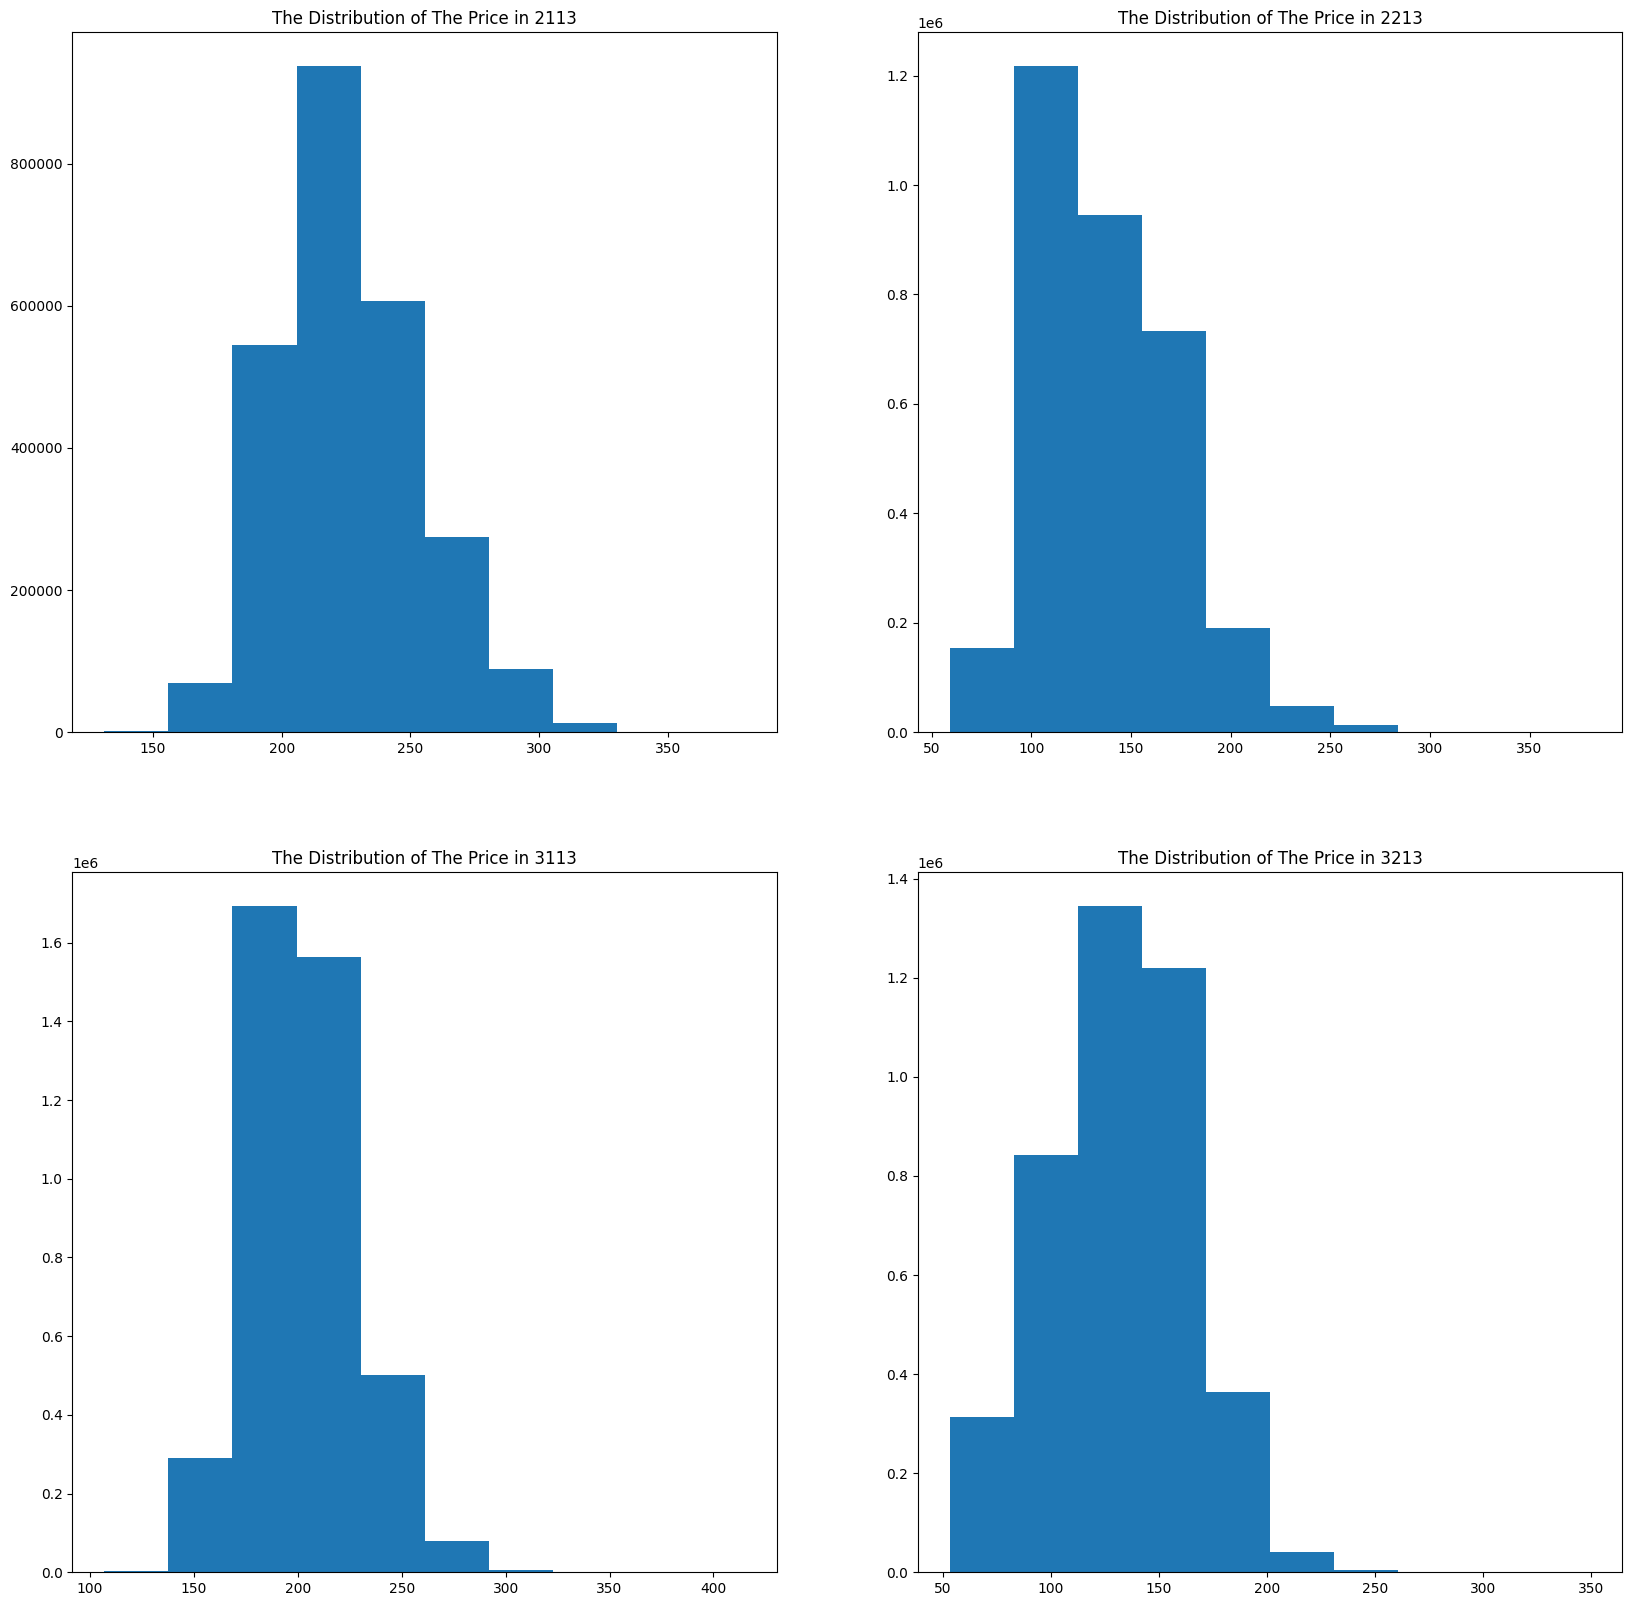

In [ ]:
## Check the distribution of price
# In the folder 2113
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

# Print some basic informations about the price
# print("The average price is {}".format(data_2113.iloc[:,1].mean().astype(float)), end ='\n\n')
# print("The cheapest price is {}".format(data_2113.iloc[:,1].min().astype(float)), end ='\n\n')
# print("The most expensive price is {}".format(data_2113.iloc[:,1].max().astype(float)), end ='\n\n')

# Show the distribution of the price
ax[0,0].hist(data_2113.iloc[:,2])
ax[0,0].set(title ="The Distribution of The Price in 2113")

ax[0,1].hist(data_2213.iloc[:,2])
ax[0,1].set(title ="The Distribution of The Price in 2213")

ax[1,0].hist(data_3113.iloc[:,2])
ax[1,0].set(title ="The Distribution of The Price in 3113")

ax[1,1].hist(data_3213.iloc[:,2])
ax[1,1].set(title ="The Distribution of The Price in 3213")
plt.show()

Text(0.5, 1.0, '3213')

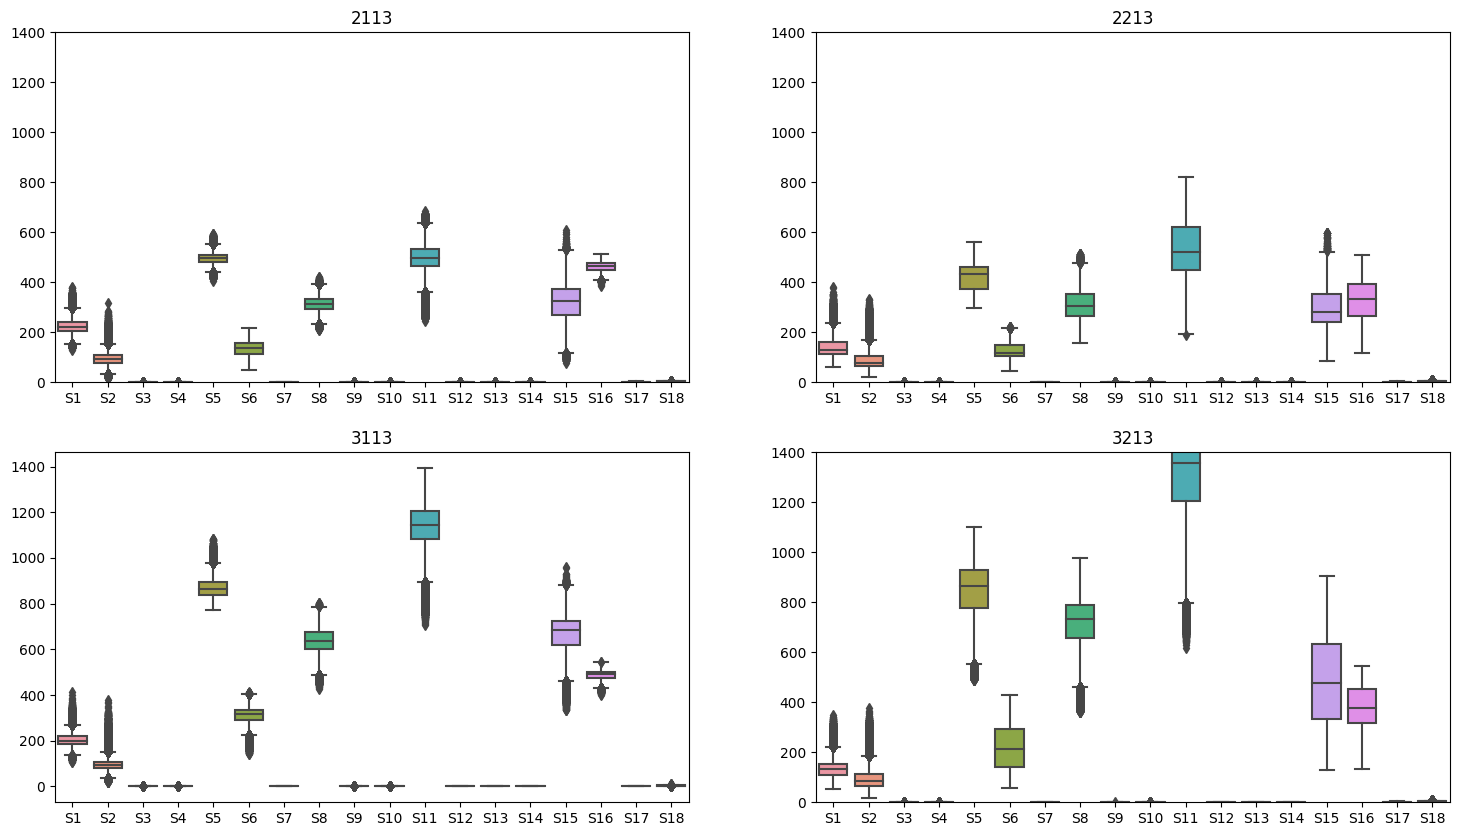

In [ ]:
# Make an analysis of the distribution of all the features in one file
figure, ax = plt.subplots(nrows=2,ncols = 2,figsize=(18, 10))

# Create boxplots of 4 folders
sns.boxplot(data=data_2113.iloc[:,2:], orient='v',ax = ax[0,0])
sns.boxplot(data=data_2213.iloc[:,2:], orient='v',ax = ax[0,1])
sns.boxplot(data=data_3113.iloc[:,2:], orient='v',ax = ax[1,0])
sns.boxplot(data=data_3213.iloc[:,2:], orient='v',ax = ax[1,1])

# Setting the y-axis data range
ax[0,1].set_ylim(0,1400)
ax[0,0].set_ylim(0,1400)
ax[1,1].set_ylim(0,1400)

# Setting the titles of distributions
ax[0,0].set_title('2113')
ax[0,1].set_title('2213')
ax[1,0].set_title('3113')
ax[1,1].set_title('3213')

In [ ]:
# Save those figures of distribution in the follow file path with format jpeg
figure.savefig("/content/drive/MyDrive/FML/features_distribuition.jpeg")

##Data Cleaning


In [ ]:
# Delete columns with missing values and the first column (contains the name of each file)
data_2113 = data_2113.drop(columns=['0','S7'], axis=1)
data_2213 = data_2213.drop(columns=['0','S7'], axis=1)
data_3113 = data_3113.drop(columns=['0','S7'], axis=1)
data_3213 = data_3213.drop(columns=['0','S7'], axis=1)

In [ ]:
# Select the values of the third and subsequent columns
X_1 = data_2113.iloc[:,1:].values
X_2 = data_2213.iloc[:,1:].values
X_3 = data_3113.iloc[:,1:].values
X_4 = data_3213.iloc[:,1:].values

# Standardize the features in data_2113
std_scale_1 = StandardScaler().fit(X_1)
X_scaled_1 = std_scale_1.transform(X_1)
# Standardize the features in data_2213
std_scale_2 = StandardScaler().fit(X_2)
X_scaled_2 = std_scale_2.transform(X_2)
# Standardize the features in data_3113
std_scale_3 = StandardScaler().fit(X_3)
X_scaled_3 = std_scale_3.transform(X_3)
# Standardize the features in data_3213
std_scale_4 = StandardScaler().fit(X_4)
X_scaled_4 = std_scale_4.transform(X_4)


##Principle Component Analysis For Each Configuration

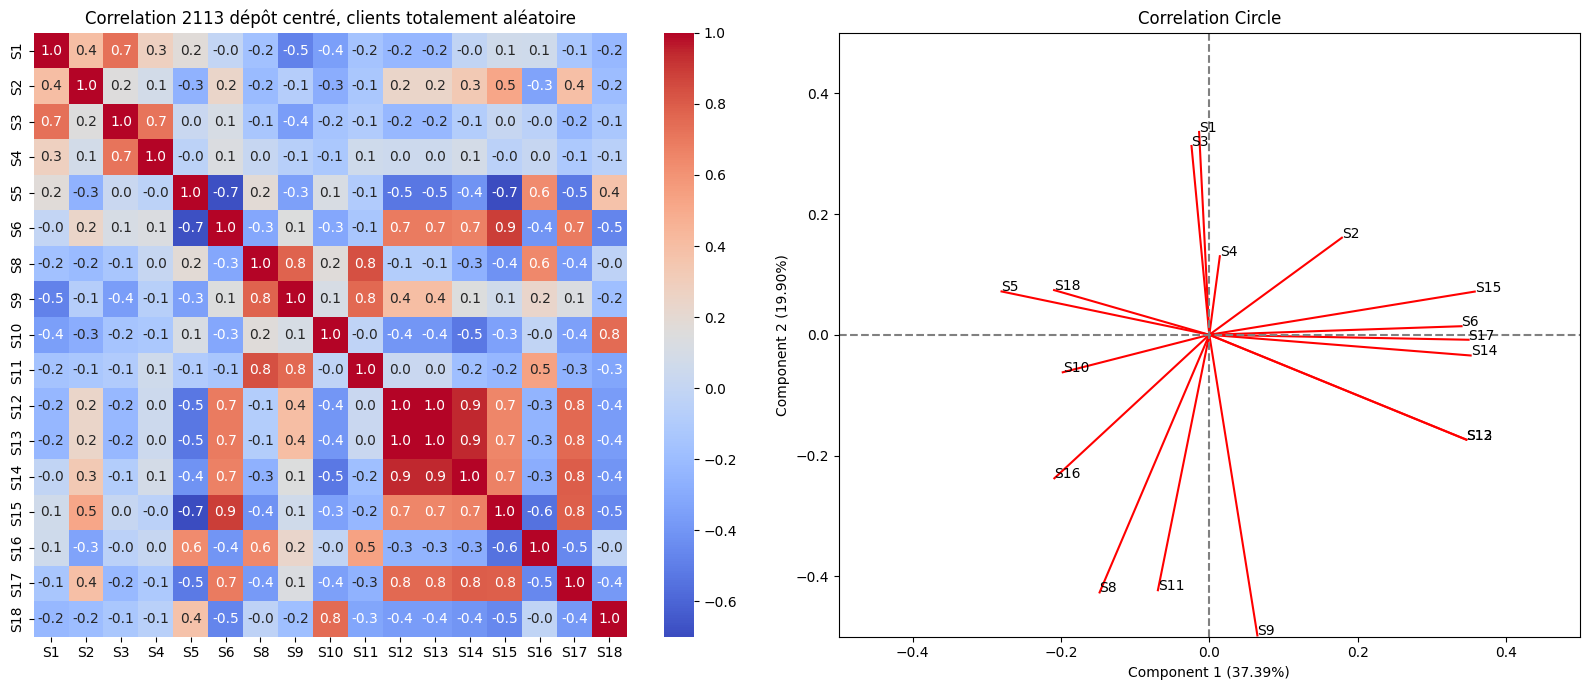

In [ ]:
# Apply the PCA in standardized data to reduce the dimensionality
pca = PCA().fit(X_scaled_1)
components = pca.components_

# Visualizing the correlation matrix of data_2113
fig, ax = plt.subplots(1, 2, figsize=(16, 7))
ax[0].set_title('Correlation 2113 dépôt centré, clients totalement aléatoire')
sns.heatmap(data_2113.iloc[:,1:].corr(),ax = ax[0], annot=True, cmap='coolwarm', fmt=".1f")

ax[1].set_title('Correlation Circle')
for i, (x, y) in enumerate(zip(components[0,:], components[1,:])):
    plt.plot([0, x], [0, y], color='r')
    plt.text(x, y, data_2113.iloc[:,1:].columns[i])

plt.plot([-0.5, 0.5], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-0.5, 0.5], color='grey', ls='--')
plt.xlabel(f'Component {1} ({pca.explained_variance_ratio_[0] * 100:.2f}%)')
plt.ylabel(f'Component {2} ({pca.explained_variance_ratio_[1] * 100:.2f}%)')

plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5);
# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plot
plt.show()

For this situation: centered depot, completely random customer position. Based on correlation heatmap and correlation circle, we have some remarks:
- Feature S4 does not bring much meaning to the dataset (can be eliminated)
- Feature S5 negatively correlate with Feature S6 (can eliminate 1 feature)
- Feature S6 strongly positively correlate with Feature S15 (can eliminate 1 feature)
- Feature S10 strongly positively correlate with Feature S18 (can eliminate 1 feature)
- Feature S8, S9, S11 strongly positively corredlated with each other (can eliminate 2)
- Feature S12, S13, S14, S17 absolutely positively corredlated with each other (can eliminate 3)

*Note: We cannot rely entirely on the correlation circle because the two principle components only represent 57% of our data set.

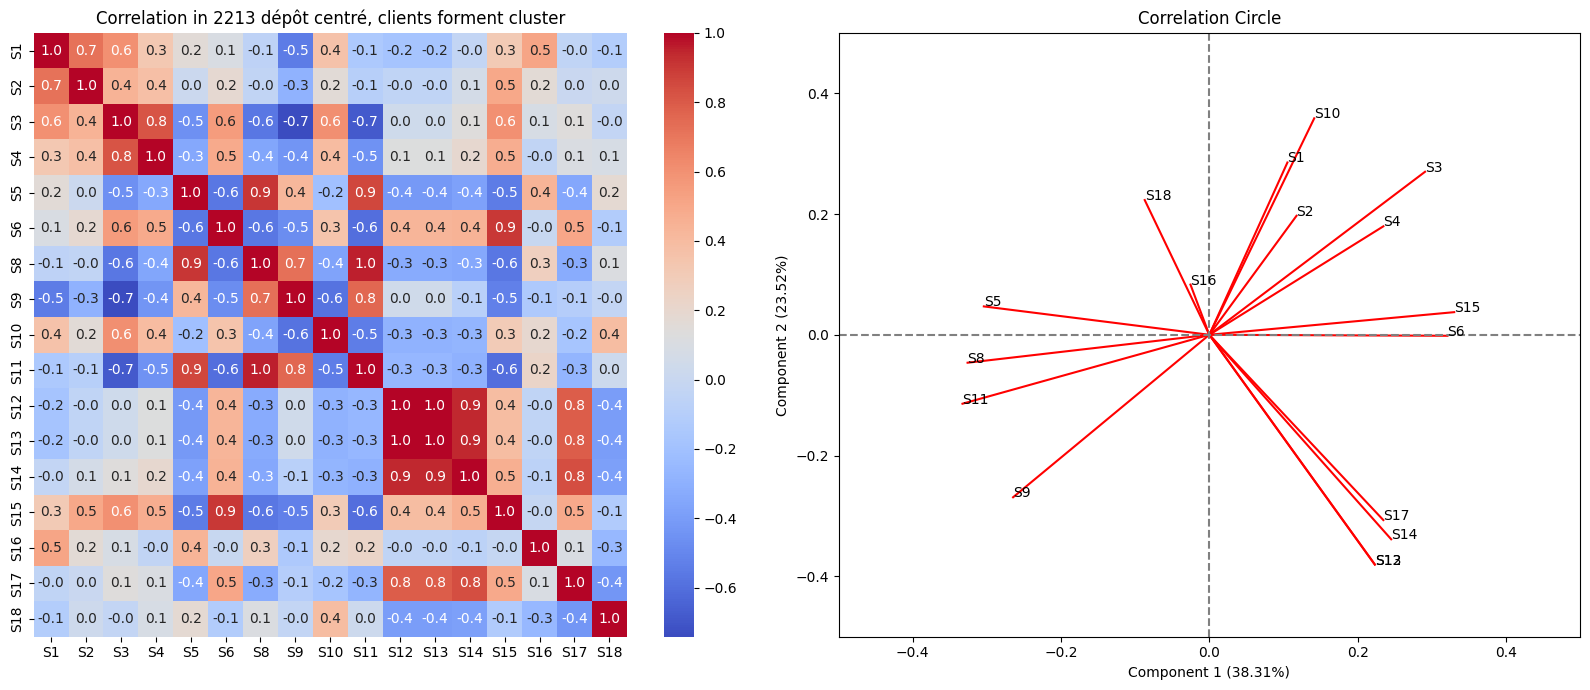

In [ ]:
pca = PCA().fit(X_scaled_2)
components = pca.components_

fig, ax = plt.subplots(1, 2, figsize=(16, 7))
ax[0].set_title('Correlation in 2213 dépôt centré, clients forment cluster')
sns.heatmap(data_2213.iloc[:,1:].corr(),ax = ax[0], annot=True, cmap='coolwarm', fmt=".1f")

ax[1].set_title('Correlation Circle')
for i, (x, y) in enumerate(zip(components[0,:], components[1,:])):
    plt.plot([0, x], [0, y], color='r')
    plt.text(x, y, data_2213.iloc[:,1:].columns[i])

plt.plot([-0.5, 0.5], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-0.5, 0.5], color='grey', ls='--')
plt.xlabel(f'Component {1} ({pca.explained_variance_ratio_[0] * 100:.2f}%)')
plt.ylabel(f'Component {2} ({pca.explained_variance_ratio_[1] * 100:.2f}%)')

plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5);
# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plot
plt.show()

For this situation: centered depot, but clients form several clusters, geographic clusters. Based on correlation heatmap and correlation circle, we have some remarks:
- Feature S3 strongly positively correlate with Feature S4 (can eliminate 1 feature) and negatively correlate with Feature S9
- Feature S5, S8, S11 absolutely positively corredlated with each other (can eliminate 2)
- Feature S6 strongly correlate positively with Feature S15 (can eliminate 1 feature)
- Feature S9 strongly positively correlate with Feature S11 (can eliminate 1 feature)
- Feature S12, S13, S14, S17 absolutely positively corredlated with each other (can eliminate 3)
- Feature S16 does not bring much meaning to the dataset (can be eliminated)


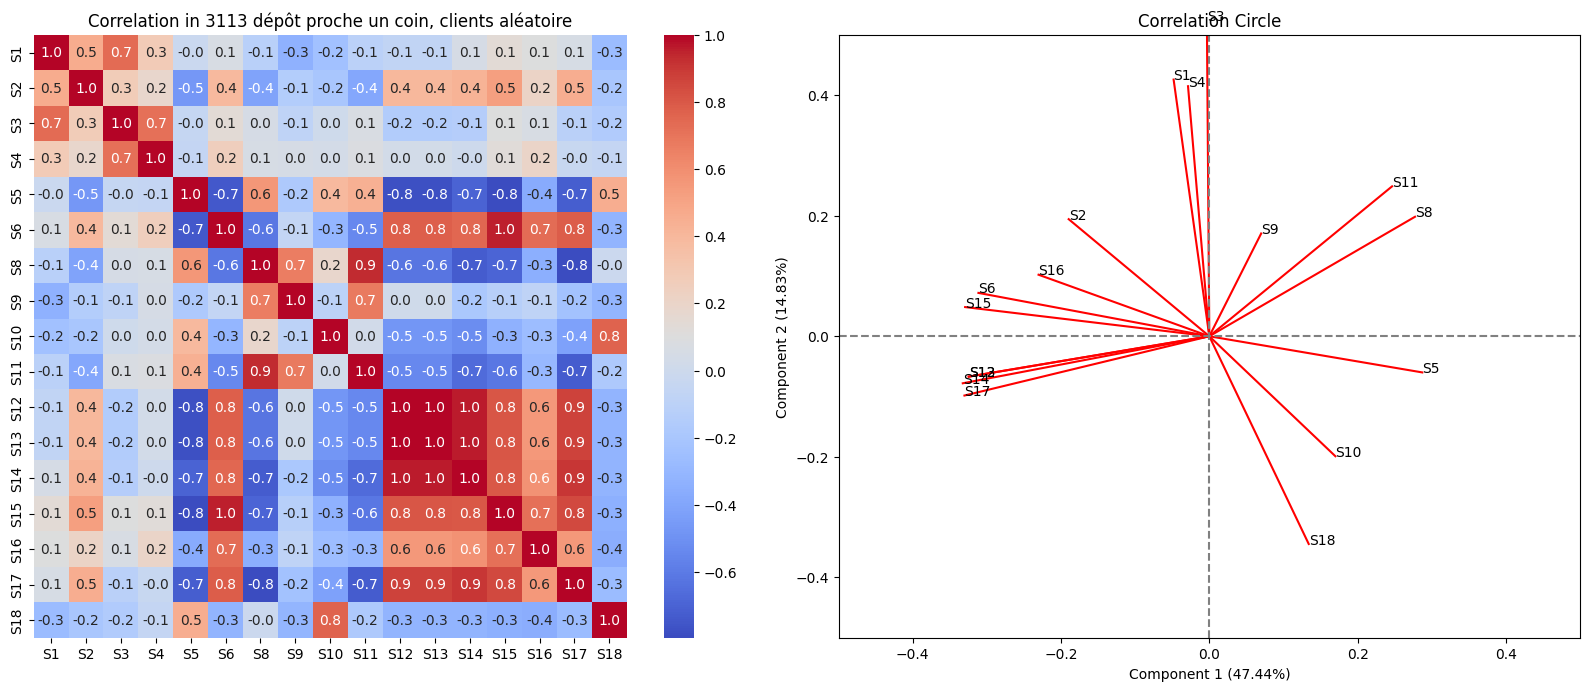

In [ ]:
pca = PCA().fit(X_scaled_3)
components = pca.components_

fig, ax = plt.subplots(1, 2, figsize=(16, 7))
ax[0].set_title('Correlation in 3113 dépôt proche un coin, clients aléatoire')
sns.heatmap(data_3113.iloc[:,1:].corr(),ax = ax[0], annot=True, cmap='coolwarm', fmt=".1f")

ax[1].set_title('Correlation Circle')
for i, (x, y) in enumerate(zip(components[0,:], components[1,:])):
    plt.plot([0, x], [0, y], color='r')
    plt.text(x, y, data_3113.iloc[:,1:].columns[i])

plt.plot([-0.5, 0.5], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-0.5, 0.5], color='grey', ls='--')
plt.xlabel(f'Component {1} ({pca.explained_variance_ratio_[0] * 100:.2f}%)')
plt.ylabel(f'Component {2} ({pca.explained_variance_ratio_[1] * 100:.2f}%)')

plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5);
# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plot
plt.show()

For this situation: depot near the corner of the map, position of the clients randomly distribute. Based on correlation heatmap and correlation circle, we have some remarks:
- Feature S5 negatively correlate with Feature S6, S12, S13, S14, S15, S17.
- Feature S6 completely positively correlate with Feature S15 (can eliminate 1 feature)
- Feature S8 completely positively correlate with Feature S11, and negatively correlate with Feature S17.
- Feature S9 does not bring much meaning to the dataset (can be eliminated)
- Feature S10 positively correlate with Feature S18
- Feature S12, S13, S14, S15, S17 absolutely positively correlated with each other (can eliminate 4 Features)

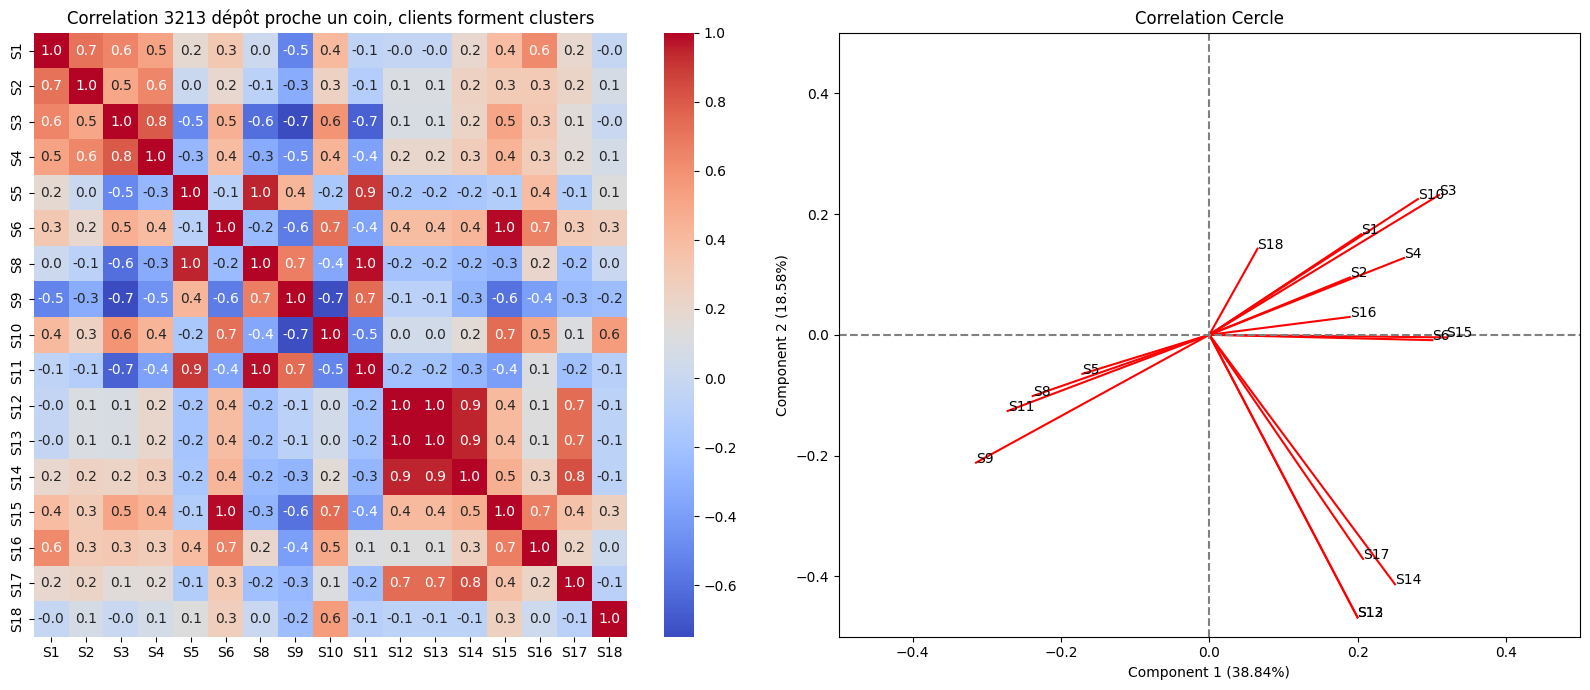

In [ ]:
pca = PCA().fit(X_scaled_4)
components = pca.components_

fig, ax = plt.subplots(1, 2, figsize=(16, 7))
ax[0].set_title('Correlation 3213 dépôt proche un coin, clients forment clusters')
sns.heatmap(data_3213.iloc[:,1:].corr(),ax = ax[0], annot=True, cmap='coolwarm', fmt=".1f")

ax[1].set_title('Correlation Cercle')
for i, (x, y) in enumerate(zip(components[0,:], components[1,:])):
    plt.plot([0, x], [0, y], color='r')
    plt.text(x, y, data_3213.iloc[:,1:].columns[i])

plt.plot([-0.5, 0.5], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-0.5, 0.5], color='grey', ls='--')
plt.xlabel(f'Component {1} ({pca.explained_variance_ratio_[0] * 100:.2f}%)')
plt.ylabel(f'Component {2} ({pca.explained_variance_ratio_[1] * 100:.2f}%)')

plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5);
# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plot
plt.show()

For this situation: depot near the corner of the map, but clients form several clusters, geographic clusters. Based on correlation heatmap and correlation circle, we have some remarks:
- Feature S3 correlate positively with Feature S4 (can eliminate 1 feature) and negatively correlate with Feature S9, S11
- Feature S5, S8, S11 absolutely positively correlate with each other (can eliminate 2 Features)
- Feature S9 negatively correlate with Feature S10
- Feature S12, S13, S14, S17 strongly correlate with each other (can eliminate 3 features)


#2 - PREPARATION THE DATASETS FOR MODEL

##Add new variables

We add new 2 variables indicate the position of the depot and how client distribute.
- For the position of the depot (column 20):
  - 0 for centered depot
  - 1 for depot near a corner of a map
- For the distribution of the clients (column 21):
  - 0 for position of client randomly
  - 1 for clients form several clusters, geographic clusters



In [ ]:
'''
#Case: Centered depot, position of client randomly
data_2113["Depot"] = 0
data_2113["Client"] = 0

#Case: Centered depot, clients form several clusters
data_2213["Depot"] = 0
data_2213["Client"] = 1

#Case: depot near a corner of a map, position of client randomly
data_3113["Depot"] = 1
data_3113["Client"] = 0

#Case: depot near a corner of a map, clients form several clusters
data_3213["Depot"] = 1
data_3213["Client"] = 1
'''

'\n#Case: Centered depot, position of client randomly\ndata_2113["Depot"] = 0\ndata_2113["Client"] = 0\n\n#Case: Centered depot, clients form several clusters\ndata_2213["Depot"] = 0\ndata_2213["Client"] = 1\n\n#Case: depot near a corner of a map, position of client randomly\ndata_3113["Depot"] = 1\ndata_3113["Client"] = 0\n\n#Case: depot near a corner of a map, clients form several clusters\ndata_3213["Depot"] = 1\ndata_3213["Client"] = 1\n'

##Selection of data in each case randomly and merge

For further processing and ensure the low computational complexity, we select 250.000 solutions (this number can be changed to test the performance of model) in each case randomly and then merge it together to create the dataset of all cases (nearly 10% of the original data)
- Why select randomly? Because the objective of this challenge is to create the regression model to predict the cost based on the features. So we don't need to select the best or the worse solution of each case.
<br><br>After those steps, we shuffle our data to mix all the cases
 together for the higher performance of training process.

In [ ]:
data_2113_random = data_2113.sample(n=250000)
data_2213_random = data_2213.sample(n=250000)
data_3113_random = data_3113.sample(n=250000)
data_3213_random = data_3213.sample(n=250000)

df_all = pd.concat([data_2113_random, data_2213_random,data_3113_random,data_3213_random], ignore_index=True)

df_all = df_all.sample(frac=1)
df_all


,Cost,S1,S2,S3,S4,S5,S6,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18
274692,12569.0,110.8010,68.0640,0.0949,0.0520,443.308,94.4094,363.923,0.3792,0.0970,654.846,0.2692,0.1346,0.0333,230.606,310.788,1.0659,3.1062
484723,7948.0,136.0670,68.8909,0.2400,0.1982,332.500,164.9340,187.200,0.2310,0.1546,323.500,0.2117,0.1059,0.0324,392.663,262.730,1.8439,4.2513
798485,19681.0,140.2940,101.8690,0.0552,0.0365,769.417,211.2760,665.000,0.4100,0.0586,1281.080,0.3704,0.1852,0.2457,471.774,355.149,2.2111,3.3177
787936,20010.0,138.5250,72.5026,0.0555,0.0295,790.167,313.2050,654.750,0.3933,0.0748,1224.670,0.3704,0.1852,0.2457,652.956,390.197,2.2111,4.0729
181793,14837.0,219.4450,96.8918,0.1928,0.1290,474.462,134.9640,352.077,0.3115,0.1578,596.538,0.2692,0.1346,0.0333,300.916,467.968,1.0659,3.0440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372986,10058.0,99.2498,43.3827,0.1307,0.0746,350.231,121.3370,257.077,0.3322,0.1419,428.385,0.2692,0.1346,0.0333,253.859,314.704,1.0659,3.7070
357536,10847.0,94.8982,63.4748,0.0791,0.0758,501.100,64.5468,395.200,0.3658,0.1109,716.500,0.2000,0.1000,0.0000,171.407,144.879,0.0000,5.4611
901188,25370.0,107.8870,79.9550,0.0309,0.0244,1018.250,105.0970,949.583,0.4506,0.0491,1800.830,0.3704,0.1852,0.2457,231.551,384.776,2.2111,4.1458
237071,15050.0,186.7580,40.9753,0.1392,0.0326,512.385,97.0325,338.923,0.2952,0.1685,560.769,0.2628,0.1314,0.0150,205.980,480.833,0.7216,3.4516


##Principle Component Analysis For Merged Dataset

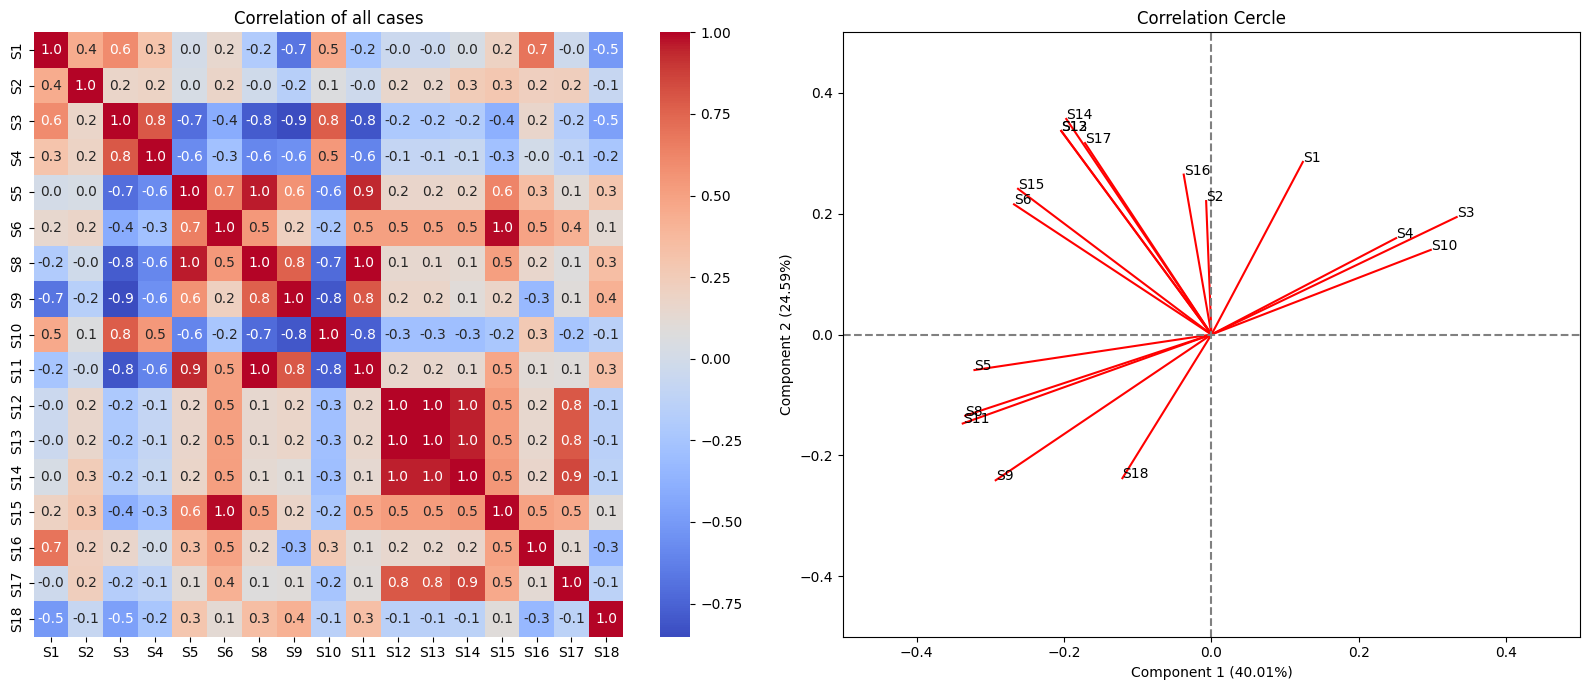

In [ ]:
X = df_all.iloc[:,1:].values #Exclude last column

std_scale = StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
pca = PCA().fit(X_scaled)
components = pca.components_

fig, ax = plt.subplots(1, 2, figsize=(16, 7))
ax[0].set_title('Correlation of all cases')
sns.heatmap(df_all.iloc[:,1:].corr(),ax = ax[0], annot=True, cmap='coolwarm', fmt=".1f")

ax[1].set_title('Correlation Cercle')
for i, (x, y) in enumerate(zip(components[0,:], components[1,:])):
    plt.plot([0, x], [0, y], color='r')
    plt.text(x, y, df_all.iloc[:,1:].columns[i])

plt.plot([-0.5, 0.5], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-0.5, 0.5], color='grey', ls='--')
plt.xlabel(f'Component {1} ({pca.explained_variance_ratio_[0] * 100:.2f}%)')
plt.ylabel(f'Component {2} ({pca.explained_variance_ratio_[1] * 100:.2f}%)')

plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5);
# Adjust layout to prevent clipping of titles
plt.tight_layout()

# Show the plot
plt.show()

This is the correlation heatmap and correlation circle for all configuration of depot and clients. As shown in these graphs, we have some remarks as follow:
- With 2 first principle components, we can represent 65% of the meaning of the features.
- There are many correlations between these features.
- Feature S3 strongly negatively correlate with Feature S9. (Can eliminate 1 feature)
- Feature S5, S8, S11 absolutely correlate with each other ( can eliminate 2 features)
- Feature S12, S13, S14 absolutely correlate with each other (can eliminate 2 features)


##Feature Selection

With the above comments, we can eliminate features that are highly correlated with each other. Therefore, we have decided to remove the following columns:
- Feature S9
- Feature S8, S11
- Feature S13, S14

In [ ]:
columns_to_remove = ['S8','S9','S11','S13','S14']
df_all = df_all.drop(columns=columns_to_remove, axis = 1)
df_all

,Cost,S1,S2,S3,S4,S5,S6,S10,S12,S15,S16,S17,S18
274692,12569.0,110.8010,68.0640,0.0949,0.0520,443.308,94.4094,0.0970,0.2692,230.606,310.788,1.0659,3.1062
484723,7948.0,136.0670,68.8909,0.2400,0.1982,332.500,164.9340,0.1546,0.2117,392.663,262.730,1.8439,4.2513
798485,19681.0,140.2940,101.8690,0.0552,0.0365,769.417,211.2760,0.0586,0.3704,471.774,355.149,2.2111,3.3177
787936,20010.0,138.5250,72.5026,0.0555,0.0295,790.167,313.2050,0.0748,0.3704,652.956,390.197,2.2111,4.0729
181793,14837.0,219.4450,96.8918,0.1928,0.1290,474.462,134.9640,0.1578,0.2692,300.916,467.968,1.0659,3.0440
...,...,...,...,...,...,...,...,...,...,...,...,...,...
372986,10058.0,99.2498,43.3827,0.1307,0.0746,350.231,121.3370,0.1419,0.2692,253.859,314.704,1.0659,3.7070
357536,10847.0,94.8982,63.4748,0.0791,0.0758,501.100,64.5468,0.1109,0.2000,171.407,144.879,0.0000,5.4611
901188,25370.0,107.8870,79.9550,0.0309,0.0244,1018.250,105.0970,0.0491,0.3704,231.551,384.776,2.2111,4.1458
237071,15050.0,186.7580,40.9753,0.1392,0.0326,512.385,97.0325,0.1685,0.2628,205.980,480.833,0.7216,3.4516


##Division of training set and test set


In [ ]:
scaler = MinMaxScaler()

# Fit and transform the features
normalized_features = scaler.fit_transform(df_all.iloc[:,1:])

# Create a new DataFrame with normalized features
X_scaled = pd.DataFrame(normalized_features, columns=df_all.iloc[:,1:].columns)

X = df_all.iloc[:,1:] #Exclude the last column to concentrate on the original features
y = df_all.iloc[:,0]

# Split the data into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaled dataset will be used to fit Linear Regression

#3 - REGRESSION MODEL FOR PREDICTING THE COST

##Linear Regression

 Root Mean Squared Error: 1325.557707256337, Time: 0.674216 seconds


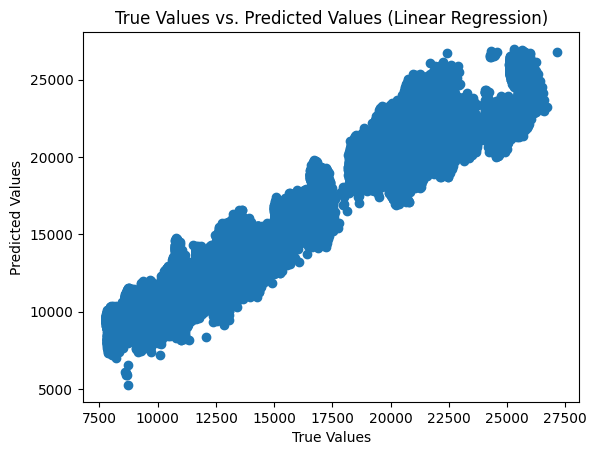

In [ ]:
# Create a linear regression model
start_time = time.time()
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = linear_model.predict(X_test_scaled)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
linear_time = time.time() - start_time
print(f" Root Mean Squared Error: {rmse}, Time: {linear_time:.6f} seconds")

# Plot the true values vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True Values vs. Predicted Values (Linear Regression)")
plt.show()

Performance of Linear Regression depend much on the size of the training set. We increased the number of dataset : the MSE increased significantly

In [ ]:
coefficients = pd.Series(linear_model.coef_, index=X.columns)

# Display the coefficients
print("Coefficients:")
print(coefficients)

Coefficients:
S1     -6818.157132
S2      2308.941244
S3      8706.562139
S4     -6104.862286
S5     20509.282447
S6      2941.764948
S10     3393.960886
S12     7189.010404
S15    -3167.834085
S16       47.809188
S17    -5039.391868
S18    -6346.811119
dtype: float64


## Linear Support Vector Regression

 Root Mean Squared Error: 1505.6416666751709, Time: 1.833206 seconds


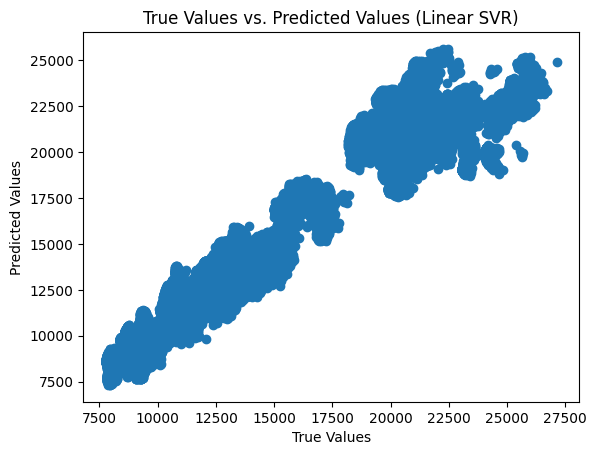

In [ ]:
from sklearn.svm import LinearSVR

start_time = time.time()

# Create a Linear Support Vector Regressor
lSVR_model = LinearSVR( random_state=0, tol=1e-5)

# Fit the model on the training data
lSVR_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = lSVR_model.predict(X_test_scaled)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
LSVR_time = time.time() - start_time
print(f" Root Mean Squared Error: {rmse}, Time: {LSVR_time:.6f} seconds")

# Plot the true values vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True Values vs. Predicted Values (Linear SVR)")
plt.show()



In [ ]:
coefficients = pd.Series(lSVR_model.coef_, index=X.columns)

# Display the coefficients
print("Coefficients:")
print(coefficients)

Coefficients:
S1     -1149.098853
S2       160.518900
S3       682.363118
S4     -1882.604508
S5     15513.914891
S6      1024.932032
S10     1575.103498
S12     5144.982305
S15      300.685734
S16     2565.500879
S17    -4214.583059
S18    -1855.464755
dtype: float64


## Gradient Bossting Regressor

 Root Mean Squared Error: 282.54766211441404, Time: 341.306374 seconds


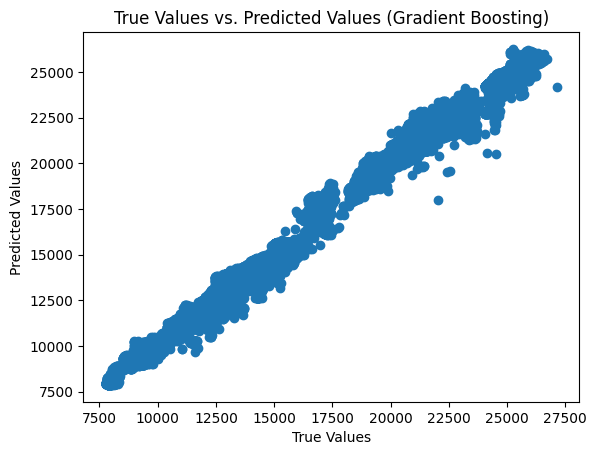

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
start_time = time.time()
# Create a Random Forest Regressor model
gb_model = GradientBoostingRegressor()

# Fit the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
gb_time = time.time() - start_time
print(f" Root Mean Squared Error: {rmse}, Time: {gb_time:.6f} seconds")

# Plot the true values vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True Values vs. Predicted Values (Gradient Boosting)")
plt.show()



Feature Importances:
S1: 0.0011
S2: 0.0001
S3: 0.0011
S4: 0.0001
S5: 0.9048
S6: 0.0003
S10: 0.0003
S12: 0.0262
S15: 0.0008
S16: 0.0224
S17: 0.0429
S18: 0.0000


<BarContainer object of 12 artists>

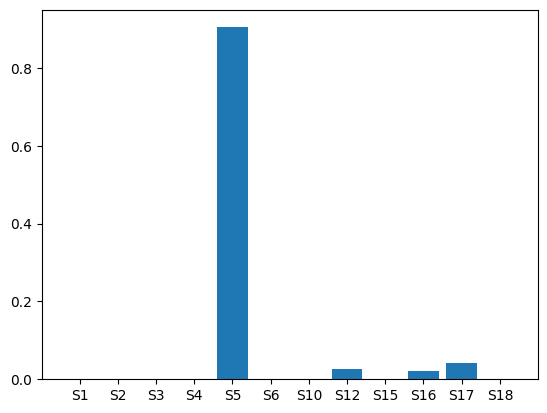

In [ ]:
# Display feature importances
feature_importances = gb_model.feature_importances_
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

# Plot feature importances
plt.bar(X.columns, feature_importances)

##Random forest regressor model

### Tunning Hyper parameters for the Random Forest Regressor

In [ ]:
# We tune some Hyper parameters in order to improve the performances of our best model (Random Forest Regressor)
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": np.arange(10, 100, 10),
        "max_depth": [None, 3, 5, 10],
        "min_samples_split": np.arange(2, 20, 2),
        "max_features": [0.5,  1, "sqrt", "auto"]
    }

rf_model = RandomizedSearchCV( RandomForestRegressor(n_jobs=-1, random_state= 42, max_samples= 100000),
                              param_distributions= grid,
                              n_iter= 5,
                              cv= 5,
                              verbose= True
)
rf_model.fit(X_train, y_train)

In [ ]:
#Check the best parameters for our Random Forest Regressor model
rf_model.best_params_

###Building model

 Root Mean Squared Error: 70.6453899467483, Time: 715.642690 seconds


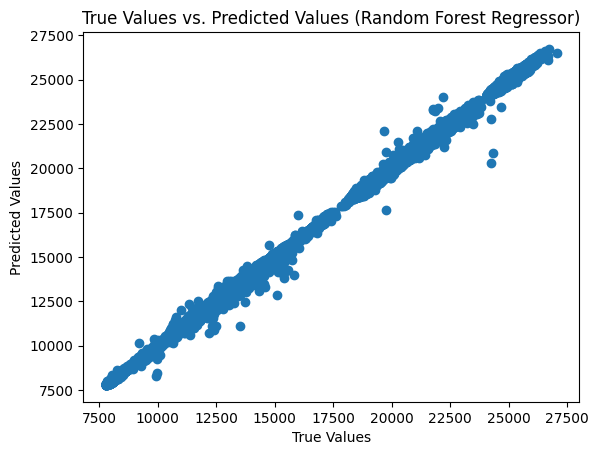

In [ ]:
from sklearn.ensemble import RandomForestRegressor
start_time = time.time()
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=40, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rf_time = time.time() - start_time
print(f" Root Mean Squared Error: {rmse}, Time: {rf_time:.6f} seconds")

# Plot the true values vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True Values vs. Predicted Values (Random Forest Regressor)")
plt.show()


Performance of Random Forest Regression depends much on the size of the training set.
<br> We increased the number of dataset 50 times and we realised that:
- the MSE decreased 14 times
- Processing time increased with the complexity of the algorithm O(m * n * log(m)).
With m is the size of dataset and n is the number of trees in this forest.

Feature Importances:
S1: 0.0027
S2: 0.0001
S3: 0.0002
S4: 0.0001
S5: 0.9150
S6: 0.0016
S10: 0.0007
S12: 0.0226
S15: 0.0024
S16: 0.0099
S17: 0.0445
S18: 0.0001


<BarContainer object of 12 artists>

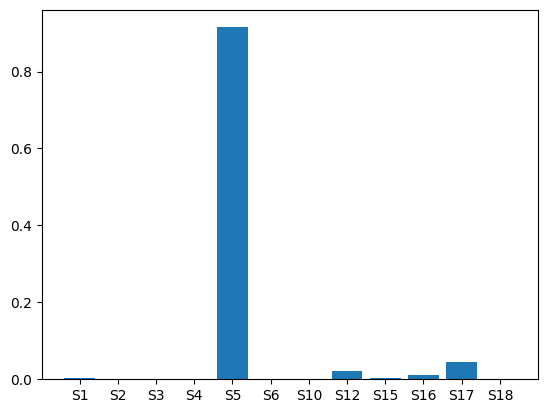

In [ ]:
# Display feature importances
feature_importances = rf_model.feature_importances_
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")

# Plot feature importances
plt.bar(X.columns, feature_importances)


## kNN Regression

In [ ]:
X_test.shape

(200000, 12)

Mean Squared Error: 358.88741524383374


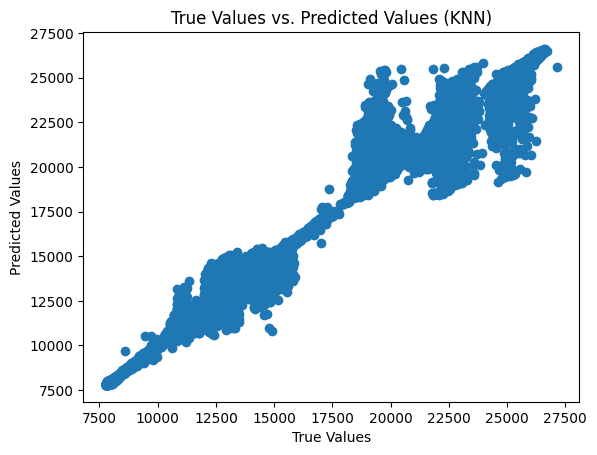

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Create a kNN Regression model
knn_regressor = KNeighborsRegressor(n_neighbors = 5)

# Fit the model
knn_regressor.fit(X_train, y_train)

# Predicte the new data
y_pred = knn_regressor.predict(X_test)

# Evaluate the model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Mean Squared Error: {rmse}')

# Show the true values and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True Values vs. Predicted Values (KNN)")
plt.show()


## Classification model of depot and clients (can be skipped)
This part will be used if we add new 2 variables related to the location of the depot and the client.<br>
But since we decided not to add it, this section is not needed <br>

From the input of route features, we want to determine the location of the depot (centered or not) and the distribution of customers (cluster or not). Based on these results, we can choose the appropriate threshold for each case.

###Classification location of the depot (centered or near the corner)

In [ ]:
y = df_all.iloc[:,-2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a Logistic Regression model
depot_model = LogisticRegression()

# Fit the model on the training data
depot_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = depot_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 1.00
Confusion Matrix:
[[99980    30]
 [   46 99944]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100010
           1       1.00      1.00      1.00     99990

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



###Classification position of the clients form clusters or randomly

In [ ]:
y = df_all.iloc[:,-1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a Logistic Regression model
client_model = LogisticRegression()

# Fit the model on the training data
client_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = client_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 1.00
Confusion Matrix:
[[100078      8]
 [     0  99914]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    100086
           1       1.00      1.00      1.00     99914

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



#4 - CLASSIFICATION MODEL FOR QUALITY OF  THE SOLUTION

Here we will divide the quality of the solution into 2 types: "Bonne" and "Mauvaise". We cannot choose a common threshold for all configurations because some configurations will be more difficult than others and difficult configurations will have a higher cost than easy configurations.
therefore we decided to take each threshold separately for each configuration by choosing its **median**. <br>
Taking the median can divide our data into 2 parts (50% each) and is suitable as a threshold in this binary classification problem.

## Data preparation for classification model

In [ ]:
#Compare the median with the cost. if cost is higher than median --> Mauvaise, lower --> Bonne
med_2113 = data_2113['Cost'].describe()['50%']
data_2113['Quality'] = ['Mauvaise' if cost > med_2113 else 'Bonne' for cost in data_2113['Cost']]
data_2113=data_2113.drop(['Cost'], axis=1)

med_2213 = data_2213['Cost'].describe()['50%']
data_2213['Quality'] = ['Mauvaise' if cost > med_2213 else 'Bonne' for cost in data_2213['Cost']]
data_2213=data_2213.drop(['Cost'], axis=1)

med_3113 = data_3113['Cost'].describe()['50%']
data_3113['Quality'] = ['Mauvaise' if cost > med_3113 else 'Bonne' for cost in data_3113['Cost']]
data_3113=data_3113.drop(['Cost'], axis=1)

med_3213 = data_3213['Cost'].describe()['50%']
data_3213['Quality'] = ['Mauvaise' if cost > med_3213 else 'Bonne' for cost in data_3213['Cost']]
data_3213=data_3213.drop(['Cost'], axis=1)

In [ ]:
data_2113_random = data_2113.sample(n=250000)
data_2213_random = data_2213.sample(n=250000)
data_3113_random = data_3113.sample(n=250000)
data_3213_random = data_3213.sample(n=250000)

df_all_classification = pd.concat([data_2113_random, data_2213_random,data_3113_random,data_3213_random], ignore_index=True)

df_all_classification = df_all_classification.sample(frac=1)

columns_to_remove = ['S8','S9','S11','S13','S14']
df_all_classification = df_all_classification.drop(columns=columns_to_remove, axis = 1)

category_mapping = {'Bonne': 1, 'Mauvaise': 0}
# Map the values in 'Category' using the dictionary
df_all_classification['Quality'] = df_all_classification['Quality'].map(category_mapping)


In [ ]:
df_all_classification.head()

,S1,S2,S3,S4,S5,S6,S10,S12,S15,S16,S17,S18,Quality
797006,161.659,118.5450,0.0503,0.0368,986.500,176.284,0.0659,0.2000,430.804,436.795,0.0000,4.3167,0
709484,216.310,142.1930,0.0850,0.0470,850.083,339.178,0.1068,0.3704,751.395,504.358,2.2111,4.2344,0
814765,124.182,90.0872,0.0810,0.0561,540.600,144.784,0.0838,0.2000,330.119,211.652,0.0000,3.8222,1
769285,136.097,93.0448,0.0524,0.0446,1000.300,347.823,0.1385,0.2000,695.474,500.364,0.0000,5.9833,0
674594,188.688,116.3160,0.0821,0.0517,851.083,335.808,0.1108,0.3704,745.949,495.923,2.2111,3.5833,0


In [ ]:
scaler = MinMaxScaler()

# Fit and transform the features
normalized_features = scaler.fit_transform(df_all_classification.iloc[:,:-1])

# Create a new DataFrame with normalized features
X_scaled = pd.DataFrame(normalized_features, columns=df_all_classification.iloc[:,:-1].columns)

X = df_all_classification.iloc[:,:-1]
y = df_all_classification.iloc[:,-1]

# Split the data into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,S1,S2,S3,S4,S5,S6,S10,S12,S15,S16,S17,S18
536566,217.463,186.0100,0.0915,0.0489,824.333,313.006,0.0813,0.3704,729.901,476.446,2.2111,3.0104
28753,270.093,75.5552,0.2379,0.0630,547.100,117.848,0.1420,0.2000,265.182,505.462,0.0000,3.0389
608548,198.484,112.7690,0.0824,0.0389,831.750,325.400,0.0877,0.3704,715.071,482.264,2.2111,3.0677
672772,183.633,54.8522,0.0986,0.0873,916.692,298.132,0.1245,0.2692,610.659,486.164,1.0659,4.3535
973691,156.683,77.7139,0.0649,0.0401,920.800,401.776,0.1519,0.3636,841.700,516.769,3.0000,5.1050


##XGBoost for Classification

In [ ]:
model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(set(y)))

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

Accuracy: 0.9827
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     99999
           1       0.98      0.98      0.98    100001

    accuracy                           0.98    200000
   macro avg       0.98      0.98      0.98    200000
weighted avg       0.98      0.98      0.98    200000



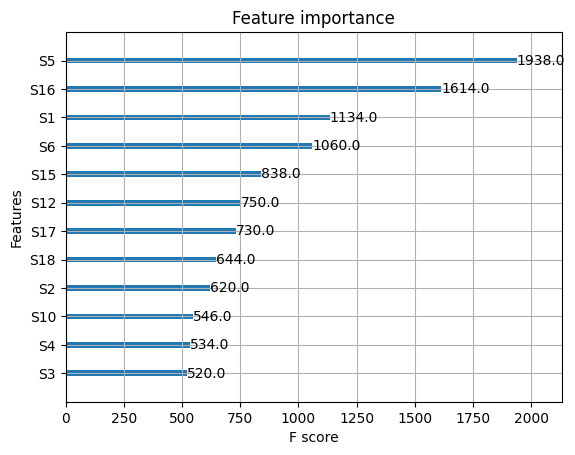

In [ ]:
from xgboost import plot_importance
# Plot feature importance
plot_importance(model)
plt.show()

##Neural Network

In [ ]:
# Build a simple dense neural network model
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model with GPU acceleration
with tf.device('/device:GPU:0'):
    history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTest accuracy:', test_acc)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                832       
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 2)                 66        
                                                                 
Total params: 2978 (11.63 KB)
Trainable params: 2978 (11.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
12500/12500 [==============================] - 48s 4ms/step - loss: 0.4643 - accuracy: 0.8053 - val_loss: 0.6073 - val_accuracy: 0.7190
Epoch 2/5
12500/12500 [==============================] - 50s 4ms/step - loss: 0.3097 - accuracy: 0.8584 - val_loss: 0.3262 - val_accuracy:

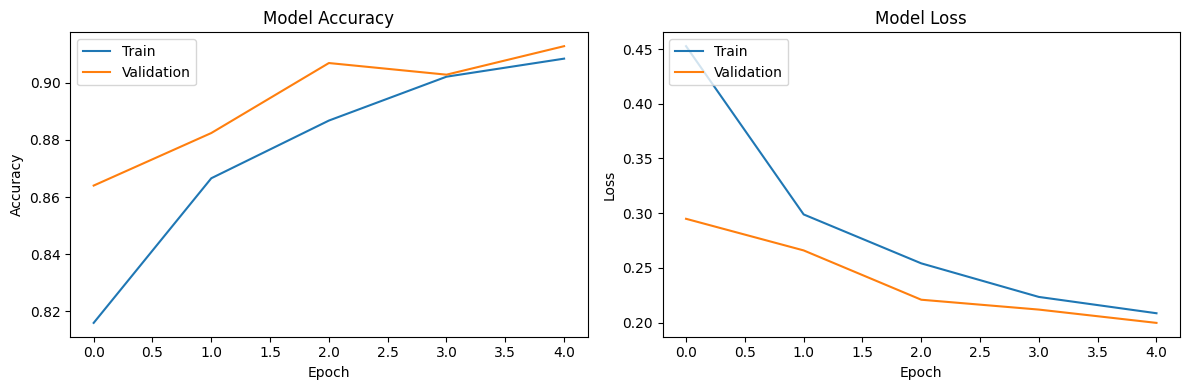

In [ ]:
# Plot the training and validation accuracy
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()